In [1]:
import torch
from torchvision import transforms
from models.data_loading import LightFieldDataset
from models.VAE_changed import VAE
from models.transformations import RandomCrop, ToTensor
from models.ViewSynthesis import Evaluation
import os

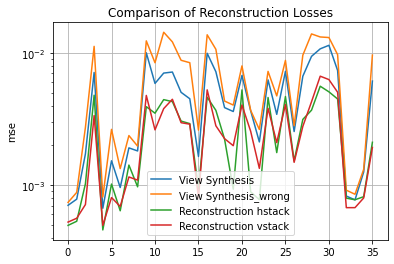

In [2]:
#def transformations before loading data
transformations = transforms.Compose([RandomCrop(128),
                                    ToTensor()
                                      ])
test_set = LightFieldDataset(sort=['test'], 
                              data_kind = 'all', 
                              root_dir = 'full_data',
                              transform = transformations)

#path where the model comes from
path = os.path.join("Model", 'model1410.pth') 

#Path where images will be saved
path1 = "Model" 

#Get the trained model
model = VAE(in_channels=27,
            in_size=128,
            hidden_dims=[64,256,512])

params = model.parameters()
learning_rate = 1e-4
optimizer = torch.optim.AdamW(params, lr=learning_rate)


state = torch.load(path, map_location=torch.device('cpu'))
#state = torch.load(path)                         # use this instead, if GPU available
model.load_state_dict(state['model'])
optimizer.load_state_dict(state['optimizer'])
model.eval()
#for state in optimizer.state.values():           # May be needed if GPU available 
#    for k, v in state.items():                   # (maybe not, I'm not sure. Might only be needed for training)
#        if torch.is_tensor(v):
#            state[k] = v.cuda()
            

# Evaluate the model            
eval = Evaluation(model, test_set, reverse=True)
eval.plot_evaluation()
eval.save_synthesized_views(path1, 30)